In [1]:
import pandas as pd
X = pd.read_hdf("/scratch/rcurrie/tumornormal/tcga_target_gtex.h5", "expression")
Y = pd.read_hdf("/scratch/rcurrie/tumornormal/tcga_target_gtex.h5", "labels")

In [3]:
# Convert tumor_normal and primary_site into numerical values for stratification and one hot encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y["tumor_normal_value"] = pd.Series(encoder.fit_transform(Y["tumor_normal"]), index=Y.index)
Y["primary_site_value"] = pd.Series(encoder.fit_transform(Y["primary_site"]), index=Y.index)

In [4]:
# Split into stratified training and test sets based primary site
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X.values, Y["primary_site"]):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    primary_site_train, primary_site_test = Y["primary_site_value"].values[train_index], Y["primary_site_value"].values[test_index]

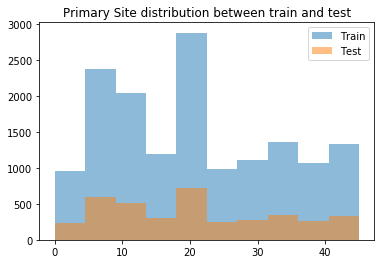

In [6]:
# Lets see how big each class is based on primary site
import matplotlib.pyplot as plt
plt.hist(Y_train.primary_site_value, alpha=0.5, label='Train')
plt.hist(Y_test.primary_site_value, alpha=0.5, label='Test')
plt.legend(loc='upper right')
plt.title("Primary Site distribution between train and test")
plt.show()

In [9]:
# Export h5 format files
with pd.HDFStore("/scratch/rcurrie/bme230b/tcga_target_gtex.h5", "w") as store:
    store["expression"] = X
    store["labels"] = Y

with pd.HDFStore("/scratch/rcurrie/bme230b/tcga_target_gtex_train.h5", "w") as store:
    store["expression"] = X_train
    store["labels"] = Y_train

with pd.HDFStore("/scratch/rcurrie/bme230b/tcga_target_gtex_test.h5", "w") as store:
    store["expression"] = X_test
    store["labels"] = Y_test